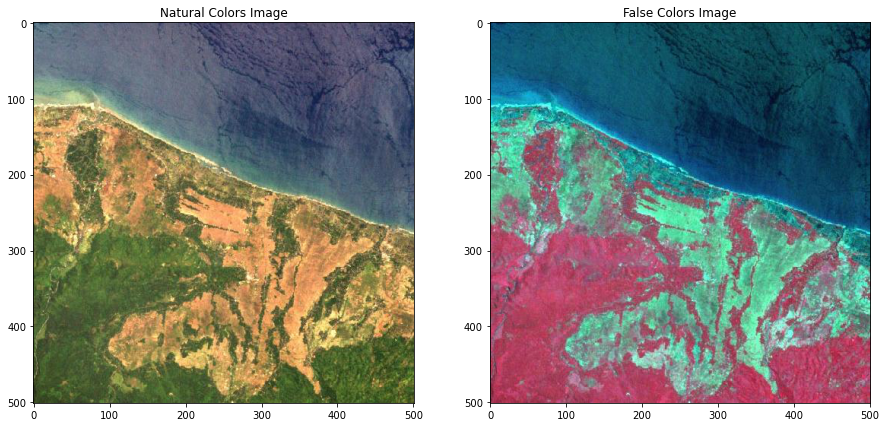

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import cv2


img_natural = plt.imread("NaturalColorImages.jpg")
img_false = plt.imread("FalseColorImages.jpg")
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Natural Colors Image")
plt.imshow(img_natural)
plt.subplot(1,2,2)
plt.title("False Colors Image")
plt.imshow(img_false)

In [2]:
def coul2grey(img):
    x=img.copy()
    im=np.zeros((len(img),len(img[0])))
    im[:][:]=np.divide(np.add(x[:,:,0],x[:,:,1],x[:,:,2]),3)
    return im

C:\Users\Asus\AppData\Local\Temp/ipykernel_7416/593041472.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  s_dir = math.atan(gx/gy)
C:\Users\Asus\AppData\Local\Temp/ipykernel_7416/593041472.py:12: RuntimeWarning: invalid value encountered in double_scalars
  s_dir = math.atan(gx/gy)


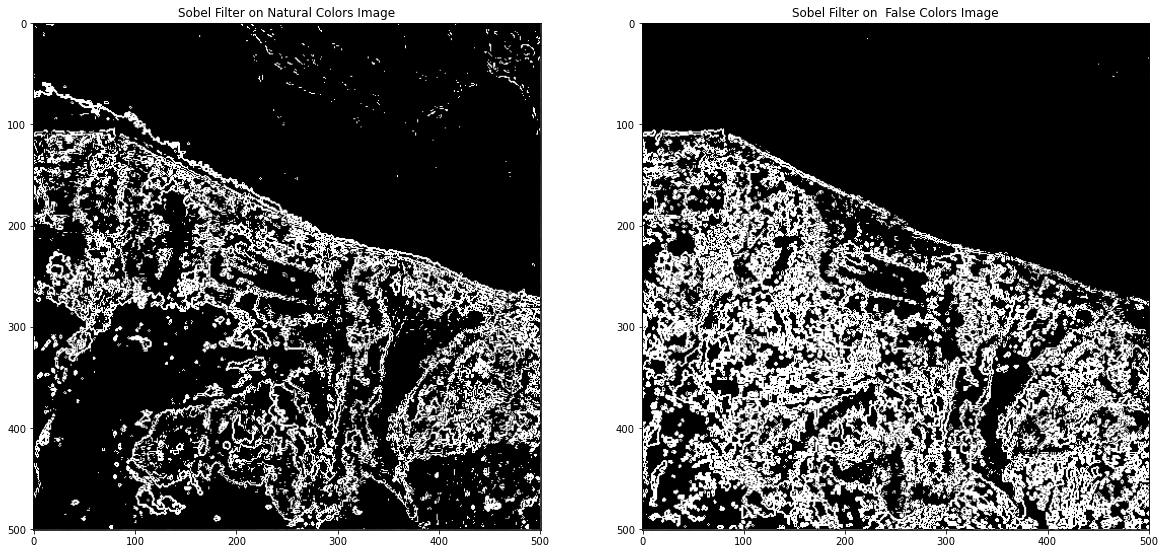

In [4]:
#Amplitude du gradient
def sobel(img,seuil):
    sob=img.copy()
    sob_direction=img.copy()
    hx = [ [-1,0,1] , [-2,0,2] , [-1,0,1] ]
    hy = [ [1,2,1] , [0,0,0] , [-1,-2,-1] ]
    for i in range(1,len(img_natural)-1):
        for j in range(1,len(img_natural[i])-1):
            gx = np.sum(np.multiply(img[i-1:i+2,j-1:j+2], hx))
            gy = np.sum(np.multiply(img[i-1:i+2,j-1:j+2], hy))
            s = math.sqrt((gx*gx)+(gy*gy))
            s_dir = math.atan(gx/gy)
            if(s<seuil):
                sob[i][j]= 0
            else:
                sob[i][j]=255
            if(s_dir<seuil):
                sob_direction[i][j]= 0
            else:
                sob_direction[i][j]=255
    return sob,sob_direction
img_grey_natural=coul2grey(img_natural)
img_grey_false=coul2grey(img_false)

sob_natural,sob_dir_natural=sobel(img_grey_natural,100)
sob_false,sob_dir_false=sobel(img_grey_false,100)

plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.title("Sobel Filter on Natural Colors Image")
plt.imshow(sob_natural,cmap='gray')

plt.subplot(1,2,2)
plt.title("Sobel Filter on  False Colors Image")
plt.imshow(sob_false,cmap='gray')

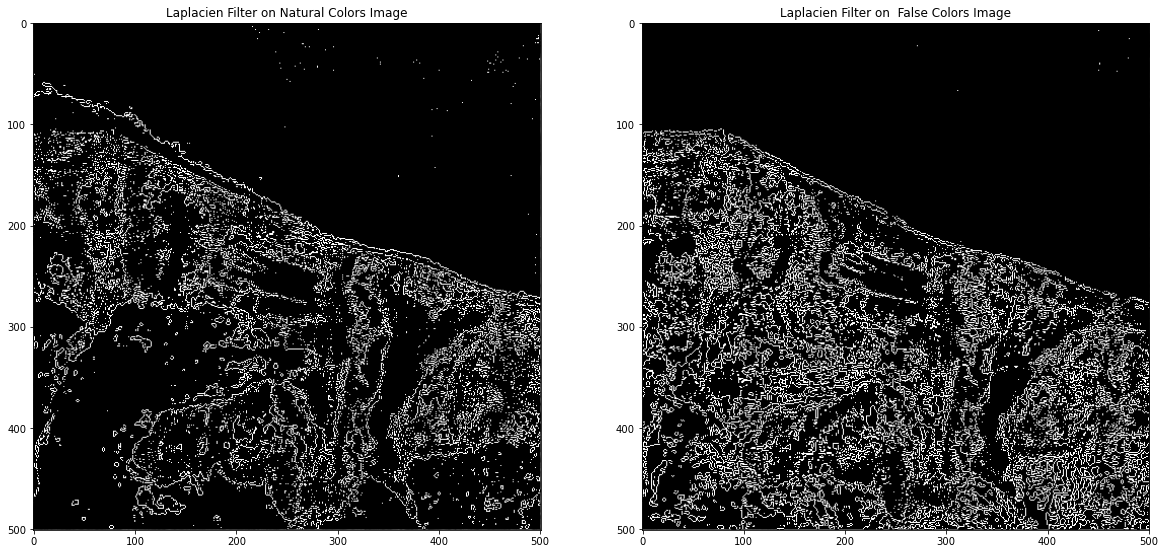

In [5]:
def laplacien(img,seuil):
    lap=img.copy()
    h=[ [-1,-1,-1] , [-1,8,-1] , [-1,-1,-1] ]
    for i in range(1,len(img)-1,1):
        for j in range(1,len(img[0])-1,1):
            lap[i][j]=np.sum(np.multiply(img[i-1:i+2,j-1:j+2], h))
    Ip=lap.copy()
    for i in range(1,len(img)-1,1):
        for j in range(1,len(img[0])-1,1):
            if(np.mean(lap[i][j])>seuil):
                Ip[i][j]=255
            else:
                Ip[i][j]=0
    Ic=lap.copy()
    for i in range(1,len(img_natural)-1,1):
        for j in range(1,len(img_natural[0])-1,1):
            if(np.mean(Ip[i][j])>np.mean(Ip[i-1][j])) or (np.mean(Ip[i][j])>np.mean(Ip[i+1][j])) or (np.mean(Ip[i][j])>np.mean(Ip[i+1][j+1]) and np.mean(Ip[i][j])>np.mean(Ip[i-1][j-1])) or (np.mean(Ip[i][j])>np.mean(Ip[i-1][j+1]) and np.mean(Ip[i][j])>np.mean(Ip[i+1][j-1])):
                Ic[i][j]=255
            else:
                Ic[i][j]=0
    return Ic
lap_natural=laplacien(img_grey_natural,100)
lap_false=laplacien(img_grey_false,100)

plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.title("Laplacien Filter on Natural Colors Image")
plt.imshow(lap_natural,cmap='gray')

plt.subplot(1,2,2)
plt.title("Laplacien Filter on  False Colors Image")
plt.imshow(lap_false,cmap='gray')

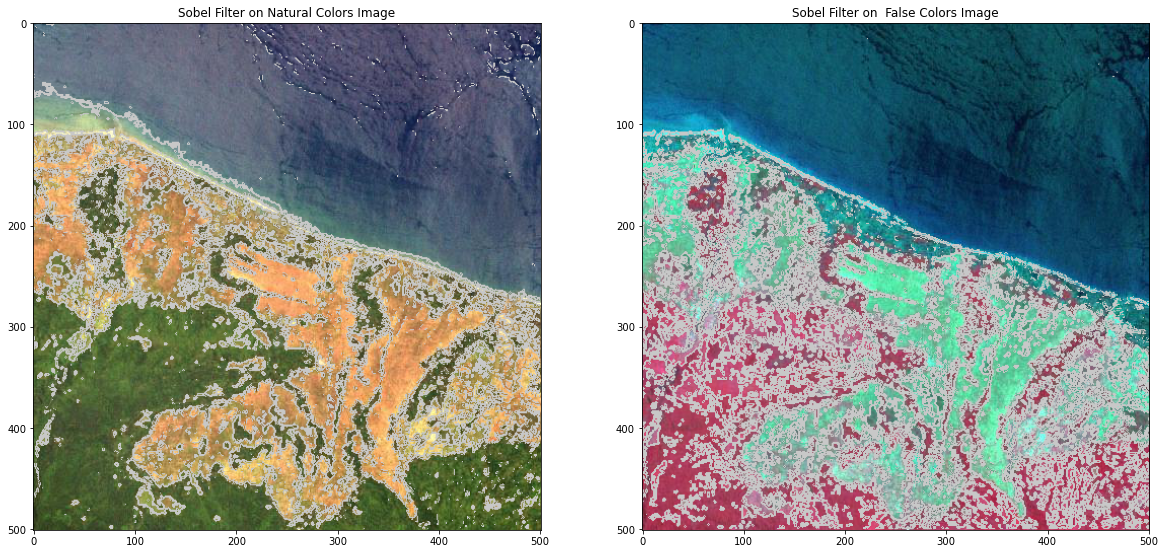

In [6]:
img_sob_natural=img_natural.copy()
img_sob_false=img_false.copy()
for i in range(len(img_natural)):
    for j in range(len(img_natural[i])):
        if(sob_natural[i][j]==255):
            img_sob_natural[i][j][0]=200
            img_sob_natural[i][j][1]=200
            img_sob_natural[i][j][2]=200
        if(sob_false[i][j]==255):
            img_sob_false[i][j][0]=200
            img_sob_false[i][j][1]=200
            img_sob_false[i][j][2]=200
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.title("Sobel Filter on Natural Colors Image")
plt.imshow(img_sob_natural,cmap='gray')

plt.subplot(1,2,2)
plt.title("Sobel Filter on  False Colors Image")
plt.imshow(img_sob_false,cmap='gray')

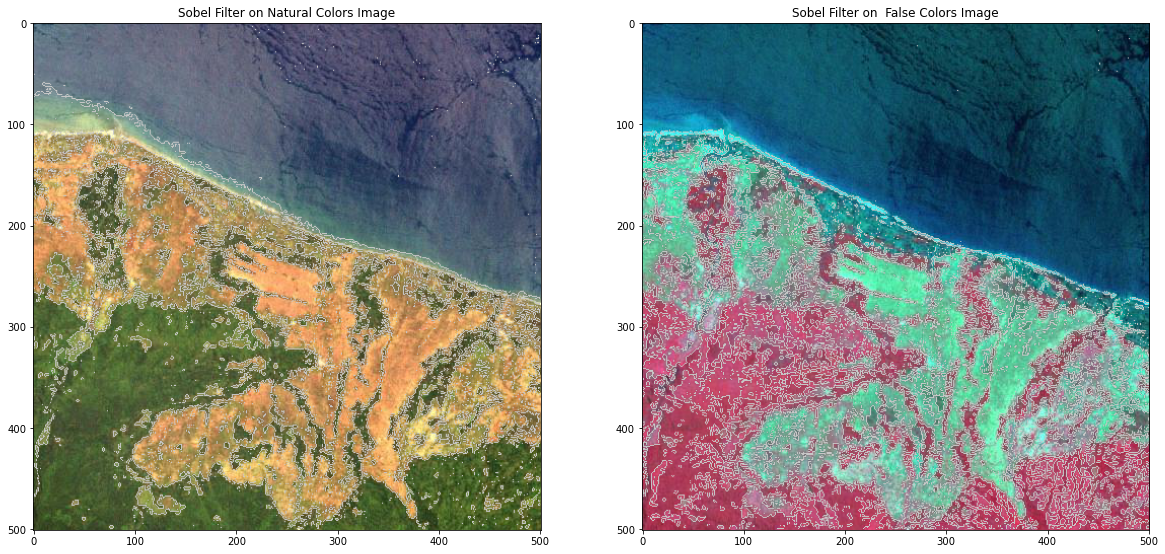

In [8]:
img_lap_natural=img_natural.copy()
img_lap_false=img_false.copy()
for i in range(len(img_natural)):
    for j in range(len(img_natural[i])):
        if(lap_natural[i][j]==255):
            img_lap_natural[i][j][0]=255
            img_lap_natural[i][j][1]=0
            img_lap_natural[i][j][2]=0

for i in range(len(img_natural)):
    for j in range(len(img_natural[i])):
        if(lap_natural[i][j]==255):
            img_lap_natural[i][j][0]=200
            img_lap_natural[i][j][1]=200
            img_lap_natural[i][j][2]=200
        if(lap_false[i][j]==255):
            img_lap_false[i][j][0]=200
            img_lap_false[i][j][1]=200
            img_lap_false[i][j][2]=200
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.title("Sobel Filter on Natural Colors Image")
plt.imshow(img_lap_natural,cmap='gray')

plt.subplot(1,2,2)
plt.title("Sobel Filter on  False Colors Image")
plt.imshow(img_lap_false,cmap='gray')

In [9]:
# Histogram function
def histogram(img):
    hist=np.zeros(256)
    n = img.shape[0]
    m = img.shape[1]
    for i in range(n):
        for j in range(m):
            hist[int(img[i][j])]+=1
    return hist

In [10]:
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0/pixel_number
    his = histogram(gray)
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in (1,254,1):
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight

        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        #print mub, muf
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img





def compute_otsu_criteria(im, th):
    # create the thresholded image
    thresholded_im = np.zeros(im.shape)
    thresholded_im[im >= th] = 1

    # compute weights
    nb_pixels = im.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # if one the classes is empty, eg all pixels are below or above the threshold, that threshold will not be considered
    # in the search for the best threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # find all pixels belonging to each class
    val_pixels1 = im[thresholded_im == 1]
    val_pixels0 = im[thresholded_im == 0]

    # compute variance of these classes
    var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0
    var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0

    return weight0 * var0 + weight1 * var1


In [12]:
img_natural_R=np.zeros((img_natural.shape[0],img_natural.shape[1]))
img_natural_G=img_natural_R.copy()
img_natural_B=img_natural_R.copy()
img_natural_R[:,:]=img_natural[:,:,0]
img_natural_G[:,:]=img_natural[:,:,1]
img_natural_B[:,:]=img_natural[:,:,2]

In [13]:
img_false_R=np.zeros((img_false.shape[0],img_false.shape[1]))
img_false_G=img_false_R.copy()
img_false_B=img_false_R.copy()
img_false_R[:,:]=img_false[:,:,0]
img_false_G[:,:]=img_false[:,:,1]
img_false_B[:,:]=img_false[:,:,2]

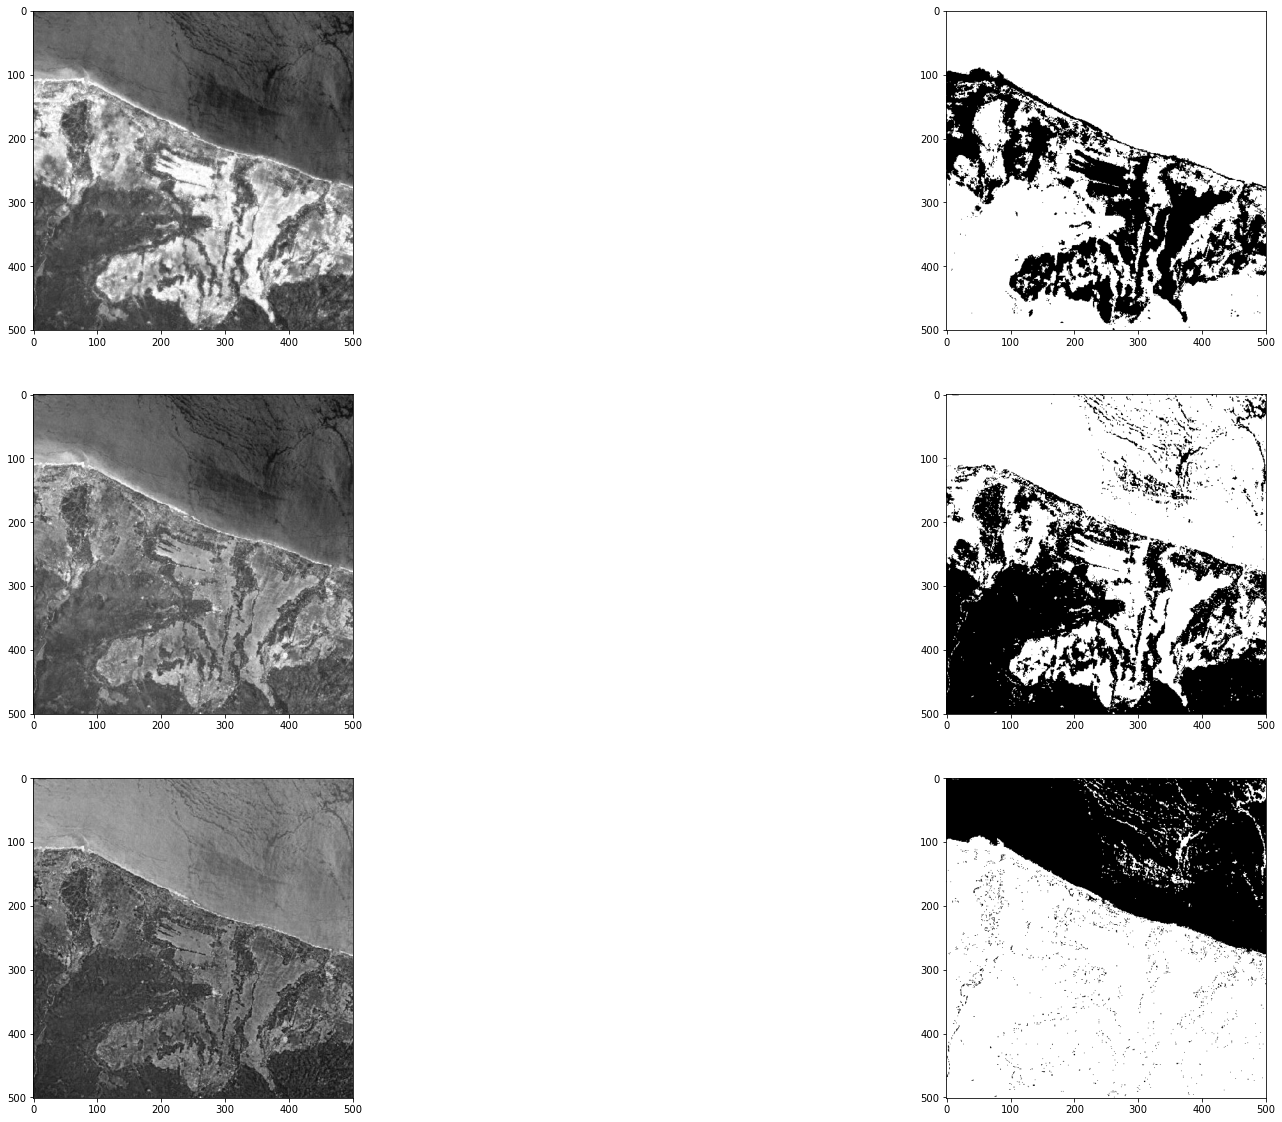

In [14]:
binary_natural_maskR = np.zeros((img_natural_R.shape[0],img_natural_R.shape[1]), dtype=bool)
binary_natural_maskG = np.zeros((img_natural_R.shape[0],img_natural_R.shape[1]), dtype=bool)
binary_natural_maskB = np.zeros((img_natural_R.shape[0],img_natural_R.shape[1]), dtype=bool)


for i in range(img_natural_R.shape[0]) :
    for j in range(img_natural_R.shape[1]) :
        if(img_natural_R[i][j] < 160):
            binary_natural_maskR[i][j]=True
        if(img_natural_R[i][j]>160 or img_natural_B[i][j] > 90):
            binary_natural_maskG[i][j]=True
        if(img_natural_B[i][j] < 90 or img_natural_R[i][j]>160):
            binary_natural_maskB[i][j]=True
            
            
plt.figure(figsize=(30,20))
plt.subplot(3,2,1)
plt.imshow(img_natural_R, cmap="gray")
plt.subplot(3,2,2)
plt.imshow(binary_natural_maskR, cmap="gray")
plt.subplot(3,2,3)
plt.imshow(img_natural_G, cmap="gray")
plt.subplot(3,2,4)
plt.imshow(binary_natural_maskG, cmap="gray")
plt.subplot(3,2,5)
plt.imshow(img_natural_B, cmap="gray")
plt.subplot(3,2,6)
plt.imshow(binary_natural_maskB, cmap="gray")

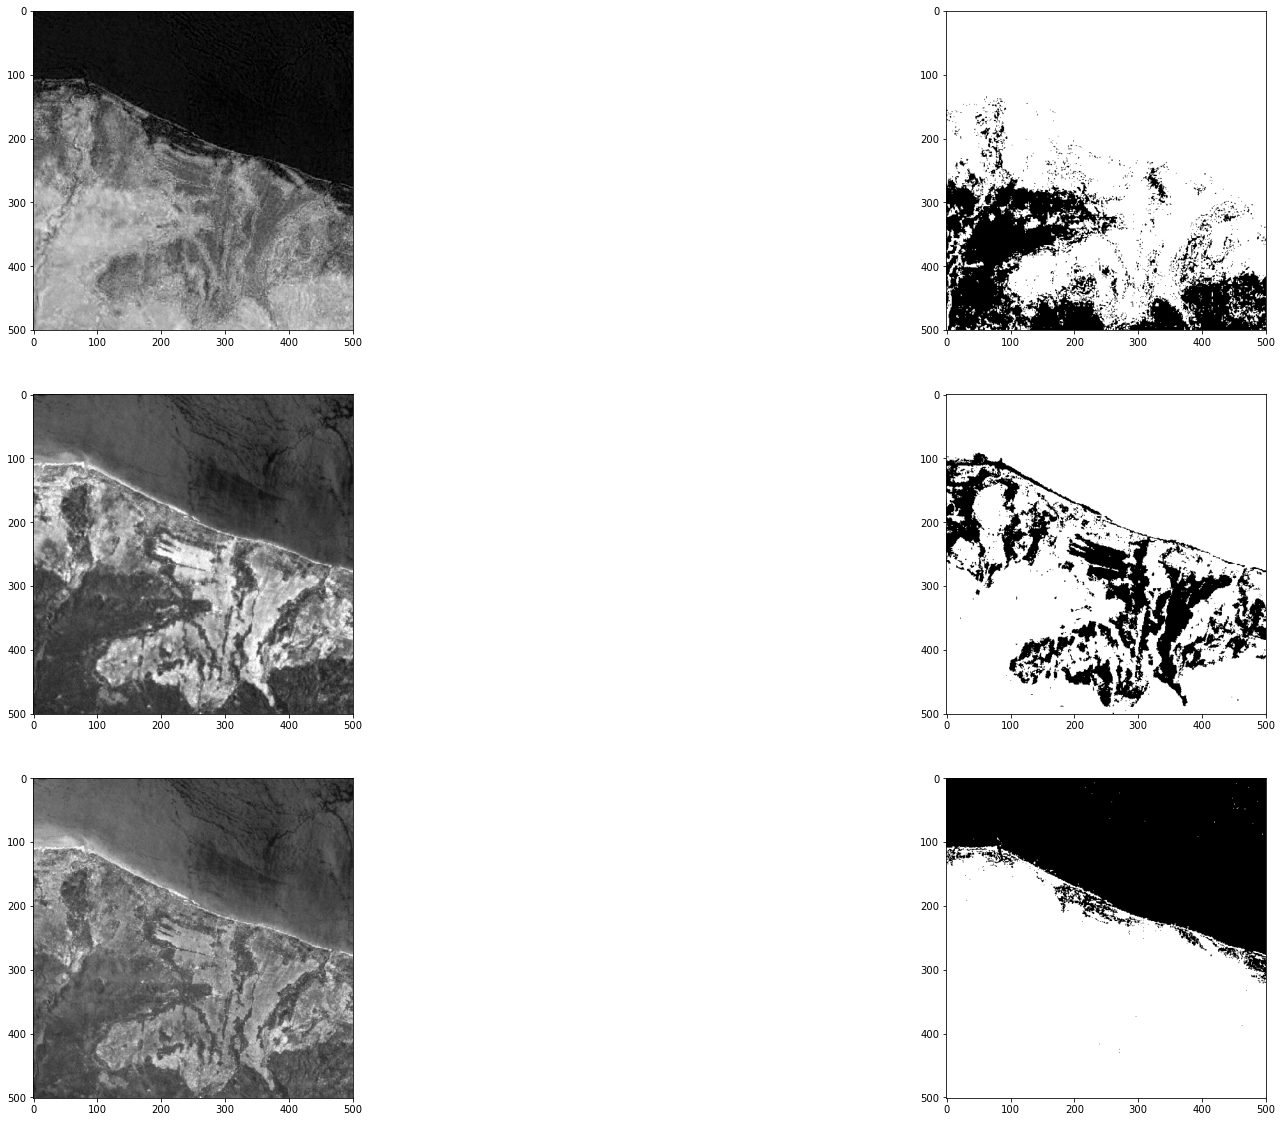

In [15]:
binary_false_maskR = np.zeros((img_false_R.shape[0],img_false_R.shape[1]), dtype=bool)
binary_false_maskG = np.zeros((img_false_R.shape[0],img_false_R.shape[1]), dtype=bool)
binary_false_maskB = np.zeros((img_false_R.shape[0],img_false_R.shape[1]), dtype=bool)


for i in range(img_false_R.shape[0]) :
    for j in range(img_false_R.shape[1]) :
        if(img_false_R[i][j] < 160):
            binary_false_maskR[i][j]=True
        if(img_false_G[i][j] < 160 ):
            binary_false_maskG[i][j]=True
        if(img_false_R[i][j] > 36):
            binary_false_maskB[i][j]=True
            
            
plt.figure(figsize=(30,20))
plt.subplot(3,2,1)
plt.imshow(img_false_R, cmap="gray")
plt.subplot(3,2,2)
plt.imshow(binary_false_maskR, cmap="gray")
plt.subplot(3,2,3)
plt.imshow(img_false_G, cmap="gray")
plt.subplot(3,2,4)
plt.imshow(binary_false_maskG, cmap="gray")
plt.subplot(3,2,5)
plt.imshow(img_false_B, cmap="gray")
plt.subplot(3,2,6)
plt.imshow(binary_false_maskB, cmap="gray")

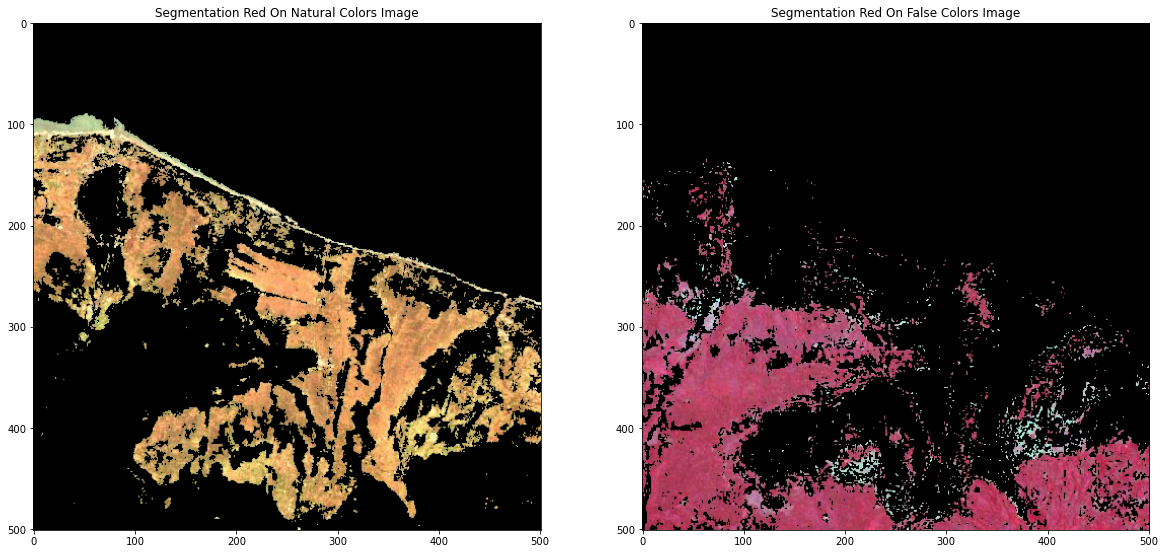

In [16]:
im_natural=img_natural.copy()
im_false=img_false.copy()
for i in range(im_natural.shape[0]) :
    for j in range(im_natural.shape[1]) :
        if(binary_natural_maskR[i][j]==True):
            im_natural[i][j]=0
        if(binary_false_maskR[i][j]==True):
            im_false[i][j]=0
plt.figure(figsize=(20,20))      
plt.subplot(1,2,1)  
plt.title("Segmentation Red On Natural Colors Image")
plt.imshow(im_natural)
plt.subplot(1,2,2)  
plt.title("Segmentation Red On False Colors Image")
plt.imshow(im_false)

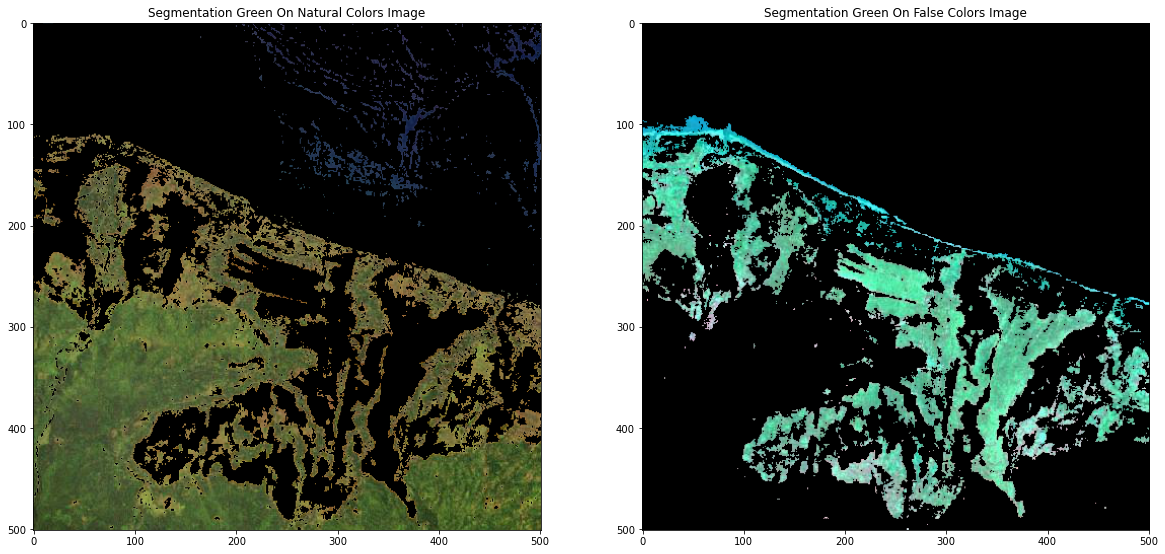

In [17]:
im_natural=img_natural.copy()
im_false=img_false.copy()
for i in range(im_natural.shape[0]) :
    for j in range(im_natural.shape[1]) :
        if(binary_natural_maskG[i][j]==True):
            im_natural[i][j]=0
        if(binary_false_maskG[i][j]==True):
            im_false[i][j]=0
plt.figure(figsize=(20,20))      
plt.subplot(1,2,1)  
plt.title("Segmentation Green On Natural Colors Image")
plt.imshow(im_natural)
plt.subplot(1,2,2)  
plt.title("Segmentation Green On False Colors Image")
plt.imshow(im_false)

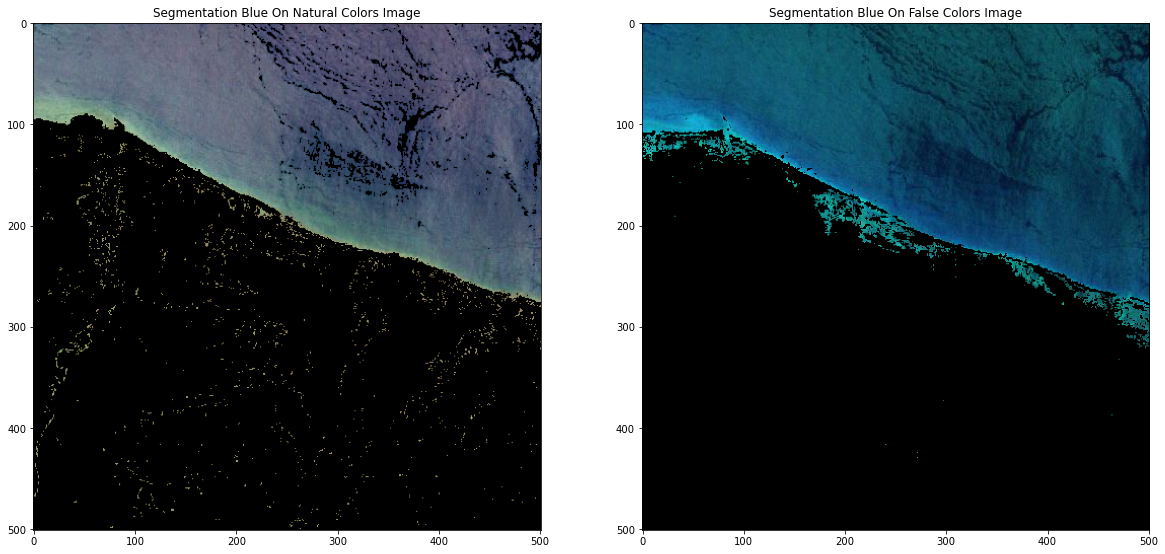

In [18]:
im_natural=img_natural.copy()
im_false=img_false.copy()
for i in range(im_natural.shape[0]) :
    for j in range(im_natural.shape[1]) :
        if(binary_natural_maskB[i][j]==True):
            im_natural[i][j]=0
        if(binary_false_maskB[i][j]==True):
            im_false[i][j]=0
plt.figure(figsize=(20,20))      
plt.subplot(1,2,1)  
plt.title("Segmentation Blue On Natural Colors Image")
plt.imshow(im_natural)
plt.subplot(1,2,2)  
plt.title("Segmentation Blue On False Colors Image")
plt.imshow(im_false)

In [20]:
class KMedoidsClass:
    def __init__(self,data,k,iters):
        self.data= data
        self.k = k
        self.iters = iters
        self.medoids = np.array([data[i] for i in range(self.k)])
        self.colors = np.array(np.random.randint(0, 255, size =(self.k, 4)))/255
        self.colors[:,3]=1

    def distance(self,p1, p2):
        return math.sqrt(np.sum((p1-p2)**2))

    def get_costs(self, medoids, data):
        tmp_clusters = {i:[] for i in range(len(medoids))}
        cst = 0
        for d in data:
            dst = np.array([self.distance(d, md) for md in medoids])
            c = dst.argmin()
            tmp_clusters[c].append(d)
            cst+=dst.min()

        tmp_clusters = {k:np.array(v) for k,v in tmp_clusters.items()}
        return tmp_clusters, cst

    def fit(self):
        samples,_ = self.data.shape

        self.clusters, cost = self.get_costs(data=self.data, medoids=self.medoids)
        count = 0

        colors =  np.array(np.random.randint(0, 255, size =(self.k, 4)))/255
        colors[:,3]=1
        plt.title(f"Step : 0")
        [plt.scatter(self.clusters[t][:, 0], self.clusters[t][:, 1], marker="*", s=100,
                                        color = colors[t]) for t in range(self.k)]
        plt.scatter(self.medoids[:, 0], self.medoids[:, 1], s=200, color=colors)
        plt.show()

        while True:
            swap = False
            for i in range(samples):
                if not i in self.medoids:
                    for j in range(self.k):
                        tmp_meds = self.medoids.copy()
                        tmp_meds[j] = i
                        clusters_, cost_ = self.get_costs(data=self.data, medoids=tmp_meds)

                        if cost_<cost:
                            self.medoids = tmp_meds
                            cost = cost_
                            swap = True
                            self.clusters = clusters_
                            print(f"Medoids Changed to: {self.medoids}.")
                            plt.title(f"Step : {count+1}")  
                            [plt.scatter(self.clusters[t][:, 0], self.clusters[t][:, 1], marker="*", s=100,
                                        color = colors[t]) for t in range(self.k)]
                            plt.scatter(self.medoids[:, 0], self.medoids[:, 1], s=200, color=colors)
                            plt.show()
            count+=1

            if count>=self.iters:
                print("End of the iterations.")
                break
            if not swap:
                print("No changes.")
                break
        return self.clusters

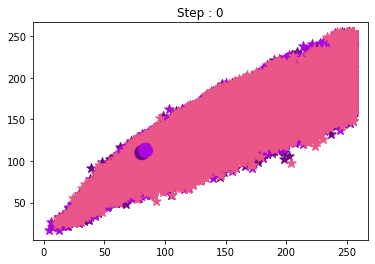

KeyboardInterrupt: 

In [24]:
dt=[]
for i in range(len(img_natural)):
    for j in range(len(img_natural[i])):
        dt.append(img_natural[i][j])
dt=np.array(dt)
kmedoid = KMedoidsClass(dt,3,5)
clusters_natural=kmedoid.fit()
print(clusters_natural)

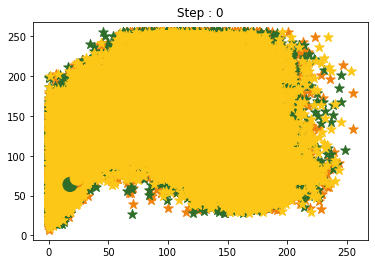

KeyboardInterrupt: 

In [25]:
dt=[]
for i in range(len(img_false)):
    for j in range(len(img_false[i])):
        dt.append(img_false[i][j])
dt=np.array(dt)
kmedoid = KMedoidsClass(dt,3,5)
clusters_false=kmedoid.fit()
print(clusters_false)

In [26]:
result_natural=img_natural.copy()
result_false=img_false.copy()


for i in range(result_natural.shape[0]):
    for j in range(result_natural.shape[0]):
        if(img_natural[i][j] in clusters_natural[0]):
            result_natural[i][j]=[255,0,0]
        elif(img_natural[i][j] in clusters_natural[1]):
            result_natural[i][j]=[0,255,0]
        elif(img_natural[i][j] in clusters_natural[2]):
            result_natural[i][j]=[0,0,255]
            
            
            
        if(img_false[i][j] in clusters_false[0]):
            result_false[i][j]=[255,0,0]
        elif(img_false[i][j] in clusters_false[1]):
            result_false[i][j]=[0,255,0]
        elif(img_false[i][j] in clusters_false[2]):
            result_false[i][j]=[0,0,255]
            
            
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)  
plt.title("Clustering On Natural Colors Image")
plt.imshow(result_natural)
plt.subplot(1,2,2)  
plt.title("Clustering On False Colors Image")
plt.imshow(result_false)

NameError: name 'clusters_natural' is not defined

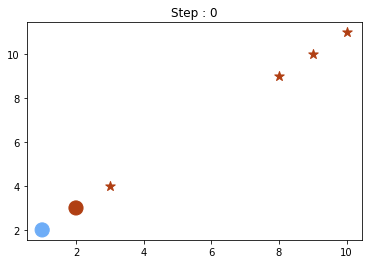

Medoids Changed to: [[4 4 4]
 [2 3 2]].


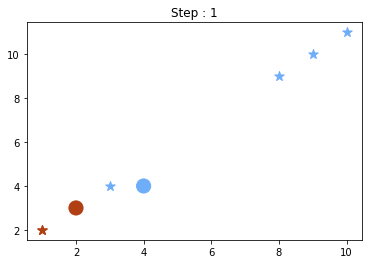

Medoids Changed to: [[5 5 5]
 [2 3 2]].


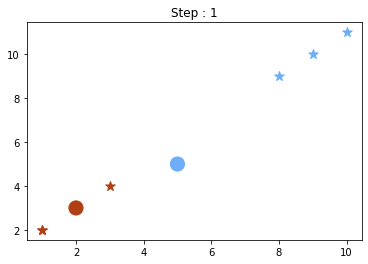

Medoids Changed to: [[6 6 6]
 [2 3 2]].


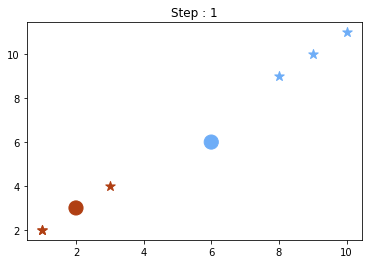

No changes.
[[1 2 1]
 [2 3 2]
 [3 4 3]
 [1 2 1]]


In [21]:
dt=np.array([[1,2,1],[2,3,2],[3,4,3],[8,9,8],[9,10,9],[1,2,1],[10,11,10]])
kmedoid = KMedoidsClass(dt,2,5)
x=kmedoid.fit()
print(x[1])

In [ ]:


class Mean_Shift:
    def __init__(self, radius=4):
        self.radius = radius
    def manhattan(self,a, b):
        return abs(a-b)
    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(new_centroid)

            uniques = sorted(list(set(new_centroids)))

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids
    def predict(self, data):
        result=[]
        for i in data:
            minn=99999
            for j in range(len(self.centroids)):
                if(minn>self.manhattan(i,self.centroids[j])):
                    minn=self.manhattan(i,self.centroids[j])
                    r=j
            result.append(r)
        return result
            



X = img_grey.flatten()
clf = Mean_Shift()
clf.fit(X)
z=clf.predict(X)
print(z)